# Actor sampling 

1. Searching for actors
2. Getting user information
3. Getting follow and following relations

In [1]:
import tweepy
import jsonpickle
from collections import defaultdict
import json
import nltk 
import pandas as pd
import re
import string


#You may need to download the following to run this code: 

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer # Porter is used below. This is an alternative, harsher stemmer. 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet



In [2]:
import tweepy 

from AppCred import CONSUMER_KEY, CONSUMER_SECRET
from AppCred import ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, timeout=600, wait_on_rate_limit = True)

In [3]:
import csv
import pandas as pd
import time
from tqdm import tqdm
import numpy as np

In [4]:
#code-bit for wrapping around scraping parts of code to follow progression and time-consumption of scraping
start=time.time()dd
end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

Adventure done. Time taken = 4.100799560546875e-05 seconds


## 1.2 Get User information

If you have a set of twitter handles/usernames then it is a good idea to get some meta data on them before you start requesting data from the user timeline or follower relations. In this way you can check your retrieved data against the data you are suppose to get. Imagine that you only get 1201 tweets from a user, instead of the maximum of 3200, is it then beacuase something went wrong or because the user only tweeted 1201 tweets in total? By having metadata on number of tweet you can check this out. The same with followers/following relations.  

https://developer.twitter.com/en/docs/twitter-api/v1/accounts-and-users/follow-search-get-users/api-reference/get-users-show


In [15]:
start=time.time()

user_list = ['@AlternativeUnge']
user_data_ÅU = {}

for user in tqdm(user_list):
    data = api.get_user(user) # I could not find a way to request multiple users data at once. 
    user_data_ÅU[user] = data

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Adventure done. Time taken = 0.4609060287475586 seconds


In [16]:
user_data_ÅU

{'@AlternativeUnge': User(_api=<tweepy.api.API object at 0x7fe03e43bac0>, _json={'id': 741924030043856896, 'id_str': '741924030043856896', 'name': 'Alternativets Unge', 'screen_name': 'AlternativeUnge', 'location': 'Danmark', 'profile_location': None, 'description': 'Klimatossernes ungdomsparti. Vi står for en seriøs bæredygtig omstilling – både miljømæssigt, socialt og økonomisk! 💚', 'url': 'https://t.co/f83pveKETE', 'entities': {'url': {'urls': [{'url': 'https://t.co/f83pveKETE', 'expanded_url': 'http://www.alternativetsunge.dk', 'display_url': 'alternativetsunge.dk', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 861, 'friends_count': 838, 'listed_count': 13, 'created_at': 'Sun Jun 12 09:24:07 +0000 2016', 'favourites_count': 2818, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 1579, 'lang': None, 'status': {'created_at': 'Sun May 16 13:19:03 +0000 2021', 'id': 1393918923746201603, 'id_str

In [8]:
start=time.time()

NY_ÅU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@AlternativeUnge', tweet_mode = 'extended', count = 100).pages()):
    NY_ÅU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

16it [00:24,  1.54s/it]

Adventure done. Time taken = 24.693973064422607 seconds


In [9]:
NY_ÅU_tweets[0]._json

{'created_at': 'Sun May 16 13:19:03 +0000 2021',
 'id': 1393918923746201603,
 'id_str': '1393918923746201603',
 'full_text': 'RT @Malthe_Iversen: "Mulighederne for at diskutére aktie-afgift over en kold Tuborg RÅ har praktisk talt været umuligt det seneste år"\nSåda…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Malthe_Iversen',
    'name': 'Malthe Uldbæk Iversen',
    'id': 2373376230,
    'id_str': '2373376230',
    'indices': [3, 18]}],
  'urls': []},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 741924030043856896,
  'id_str': '741924030043856896',
  'name': 'Alternativets Unge',
  'screen_name': 'AlternativeUnge',
  'location': 'Danmark',
  'description': 'Klimatossernes

In [10]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in NY_ÅU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    "tweet_created_at": tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

NY_ÅU_df = pd.DataFrame(twitter_dictionary)

NY_ÅU_df.head()

Adventure done. Time taken = 0.03454422950744629 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1393918923746201603,Sun May 16 13:19:03 +0000 2021,True,"""Mulighederne for at diskutére aktie-afgift ov...",[],"[LMÅ21, dkpol]",Malthe_Iversen
1,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1374252661516697603,Tue Mar 23 06:52:21 +0000 2021,False,I Alternativets Unge er vi meget bekymret for ...,[],"[dkpol, COVID19dk, Corona]",NaN
2,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1371800717829173249,Tue Mar 16 12:29:12 +0000 2021,False,"Til alle, der skulle være i tvivl!💪 https://t....",[],[],NaN
3,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1365237571580788742,Fri Feb 26 09:49:36 +0000 2021,False,Klimarådets rapport viser en tydelig konklusio...,[DanJoergensen],"[klimarådet, dkpol]",NaN
4,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1357273162510184450,Thu Feb 04 10:21:53 +0000 2021,False,@uffeelbaek @KaareDybvad @sbporse @SikandaSIDD...,"[uffeelbaek, KaareDybvad, sbporse, SikandaSIDD...",[],NaN


#### Youth Parties

In [11]:
start=time.time()

user_list = ['@DFUngdom', '@KU_DK','@LiberalUngdomDK', '@postnyeborgerl1','@radikalungdom',
            '@SF_Ungdom','@DSU_1920','@sufnet', '@rgungdom', '@VUngdom']
user_data = {}

for user in tqdm(user_list):
    data = api.get_user(user) # I could not find a way to request multiple users data at once. 
    user_data[user] = data

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

100%|██████████| 10/10 [00:03<00:00,  2.63it/s]

Adventure done. Time taken = 3.811069965362549 seconds


In [13]:
user_data

{'@DFUngdom': User(_api=<tweepy.api.API object at 0x7fe03e43bac0>, _json={'id': 2758236479, 'id_str': '2758236479', 'name': 'Dansk Folkepartis Ungdom', 'screen_name': 'DFUngdom', 'location': '', 'profile_location': None, 'description': 'Frihed, fællesskab og fædreland | Vi mener, at frihed, fællesskab og fædrelandet er grundstenene i ethvert samfund!🇩🇰', 'url': 'https://t.co/ZpcZkwZsNm', 'entities': {'url': {'urls': [{'url': 'https://t.co/ZpcZkwZsNm', 'expanded_url': 'http://df-ungdom.dk/', 'display_url': 'df-ungdom.dk', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1083, 'friends_count': 146, 'listed_count': 23, 'created_at': 'Mon Sep 01 14:25:23 +0000 2014', 'favourites_count': 1138, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 691, 'lang': None, 'status': {'created_at': 'Tue Dec 29 21:30:50 +0000 2020', 'id': 1344033157927079939, 'id_str': '1344033157927079939', 'text': 'SELVOM MAN HEDD

In [17]:
#Checking amount of tweets, followers and friends
print(user_data_ÅU['@AlternativeUnge']._json['statuses_count']) # number of tweets
print(user_data_ÅU['@AlternativeUnge']._json['followers_count']) # number of followers
print(user_data_ÅU['@AlternativeUnge']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

1579
861
838


In [18]:
#Checking amount of tweets, followers and friends
print(user_data['@DFUngdom']._json['statuses_count']) # number of tweets
print(user_data['@DFUngdom']._json['followers_count']) # number of followers
print(user_data['@DFUngdom']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

691
1083
146


In [19]:
#Checking amount of tweets, followers and friends
print(user_data['@KU_DK']._json['statuses_count']) # number of tweets
print(user_data['@KU_DK']._json['followers_count']) # number of followers
print(user_data['@KU_DK']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

780
1873
370


In [20]:
#Checking amount of tweets, followers and friends
print(user_data['@LiberalUngdomDK']._json['statuses_count']) # number of tweets
print(user_data['@LiberalUngdomDK']._json['followers_count']) # number of followers
print(user_data['@LiberalUngdomDK']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

862
2088
1895


In [21]:
#Checking amount of tweets, followers and friends
print(user_data['@postnyeborgerl1']._json['statuses_count']) # number of tweets
print(user_data['@postnyeborgerl1']._json['followers_count']) # number of followers
print(user_data['@postnyeborgerl1']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

0
21
0


In [22]:
#Checking amount of tweets, followers and friends
print(user_data['@radikalungdom']._json['statuses_count']) # number of tweets
print(user_data['@radikalungdom']._json['followers_count']) # number of followers
print(user_data['@radikalungdom']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

2752
3693
1103


In [23]:
#Checking amount of tweets, followers and friends
print(user_data['@SF_Ungdom']._json['statuses_count']) # number of tweets
print(user_data['@SF_Ungdom']._json['followers_count']) # number of followers
print(user_data['@SF_Ungdom']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

538
1427
148


In [24]:
#Checking amount of tweets, followers and friends
print(user_data['@DSU_1920']._json['statuses_count']) # number of tweets
print(user_data['@DSU_1920']._json['followers_count']) # number of followers
print(user_data['@DSU_1920']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

1327
3392
516


In [25]:
#Checking amount of tweets, followers and friends
print(user_data['@sufnet']._json['statuses_count']) # number of tweets
print(user_data['@sufnet']._json['followers_count']) # number of followers
print(user_data['@sufnet']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

313
611
171


In [26]:
#Checking amount of tweets, followers and friends
print(user_data['@rgungdom']._json['statuses_count']) # number of tweets
print(user_data['@rgungdom']._json['followers_count']) # number of followers
print(user_data['@rgungdom']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

92
810
53


In [27]:
#Checking amount of tweets, followers and friends
print(user_data['@VUngdom']._json['statuses_count']) # number of tweets
print(user_data['@VUngdom']._json['followers_count']) # number of followers
print(user_data['@VUngdom']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

127
849
117


In [29]:
tweets_total = int(user_data_ÅU['@AlternativeUnge']._json['statuses_count'])+int(user_data['@DFUngdom']._json['statuses_count'])+int(user_data['@KU_DK']._json['statuses_count'])+int(user_data['@LiberalUngdomDK']._json['statuses_count'])+int(user_data['@postnyeborgerl1']._json['statuses_count'])+int(user_data['@radikalungdom']._json['statuses_count'])+int(user_data['@SF_Ungdom']._json['statuses_count'])+int(user_data['@DSU_1920']._json['statuses_count'])+int(user_data['@sufnet']._json['statuses_count'])+int(user_data['@VUngdom']._json['statuses_count'])
tweets_total

8969

### Mother parties

In [30]:
start=time.time()

user_list = ['@alternativet_','@DanskDf1995', '@KonservativeDK','@NyeBorgerlige', '@LiberalAlliance','@radikale',
            '@SFpolitik','@Spolitik','@Enhedslisten', '@venstredk']
user_data = {}

for user in tqdm(user_list):
    data = api.get_user(user) # I could not find a way to request multiple users data at once. 
    user_data[user] = data

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

100%|██████████| 10/10 [00:03<00:00,  2.53it/s]

Adventure done. Time taken = 3.9621171951293945 seconds


In [31]:
#Checking amount of tweets, followers and friends
print(user_data['@alternativet_']._json['statuses_count']) # number of tweets
print(user_data['@alternativet_']._json['followers_count']) # number of followers
print(user_data['@alternativet_']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

29702
30210
3816


In [32]:
#Checking amount of tweets, followers and friends
print(user_data['@DanskDf1995']._json['statuses_count']) # number of tweets
print(user_data['@DanskDf1995']._json['followers_count']) # number of followers
print(user_data['@DanskDf1995']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

6064
20618
647


In [33]:
#Checking amount of tweets, followers and friends
print(user_data['@KonservativeDK']._json['statuses_count']) # number of tweets
print(user_data['@KonservativeDK']._json['followers_count']) # number of followers
print(user_data['@KonservativeDK']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

7240
29540
4561


In [34]:
#Checking amount of tweets, followers and friends
print(user_data['@NyeBorgerlige']._json['statuses_count']) # number of tweets
print(user_data['@NyeBorgerlige']._json['followers_count']) # number of followers
print(user_data['@NyeBorgerlige']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

54
3231
31


In [35]:
#Checking amount of tweets, followers and friends
print(user_data['@LiberalAlliance']._json['statuses_count']) # number of tweets
print(user_data['@LiberalAlliance']._json['followers_count']) # number of followers
print(user_data['@LiberalAlliance']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

7380
39497
4110


In [36]:
#Checking amount of tweets, followers and friends
print(user_data['@radikale']._json['statuses_count']) # number of tweets
print(user_data['@radikale']._json['followers_count']) # number of followers
print(user_data['@radikale']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

19776
48362
11496


In [37]:
#Checking amount of tweets, followers and friends
print(user_data['@SFpolitik']._json['statuses_count']) # number of tweets
print(user_data['@SFpolitik']._json['followers_count']) # number of followers
print(user_data['@SFpolitik']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

10762
30187
290


In [38]:
#Checking amount of tweets, followers and friends
print(user_data['@Spolitik']._json['statuses_count']) # number of tweets
print(user_data['@Spolitik']._json['followers_count']) # number of followers
print(user_data['@Spolitik']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

2414
59418
448


In [39]:
#Checking amount of tweets, followers and friends
print(user_data['@Enhedslisten']._json['statuses_count']) # number of tweets
print(user_data['@Enhedslisten']._json['followers_count']) # number of followers
print(user_data['@Enhedslisten']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

8862
35452
454


In [40]:
#Checking amount of tweets, followers and friends
print(user_data['@venstredk']._json['statuses_count']) # number of tweets
print(user_data['@venstredk']._json['followers_count']) # number of followers
print(user_data['@venstredk']._json['friends_count']) # number of that I follow(apparently my friends, sadly many of them don't follow me back)

6070
52888
596


In [41]:
mor_tweets_total = int(user_data['@alternativet_']._json['statuses_count'])+int(user_data['@DanskDf1995']._json['statuses_count'])+int(user_data['@KonservativeDK']._json['statuses_count'])+int(user_data['@NyeBorgerlige']._json['statuses_count'])+int(user_data['@LiberalAlliance']._json['statuses_count'])+int(user_data['@radikale']._json['statuses_count'])+int(user_data['@SFpolitik']._json['statuses_count'])+int(user_data['@Enhedslisten']._json['statuses_count'])+int(user_data['@Spolitik']._json['statuses_count'])+int(user_data['@venstredk']._json['statuses_count'])
mor_tweets_total

98324

## 1.2 Getting tweets from a list of actors, using the usertimeline

Below we have a userlist with the actors we are interested in and then we ask for their last 3200 tweets. We also generate a 

### Youth parties

In [19]:
?api.search

In [42]:
user_list = ['@AlternativeUnge','@DFUngdom', '@KU_DK','@LiberalUngdomDK', '@postnyeborgerl1','@radikalungdom',
            '@SF_Ungdom','@DSU_1920','@sufnet', '@rgungdom', '@VUngdom']

In [43]:
user_collected = []  # the list of users whoms data we already have

In [44]:
userlist_to_collect = [user for user in user_list if user not in user_collected]

In [45]:
start=time.time()

ÅU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@AlternativeUnge', tweet_mode = 'extended', count = 100).pages()):
    ÅU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

11it [00:17,  1.62s/it]


TweepError: Failed to send request: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))

In [ ]:
len(ÅU_tweets)

In [162]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
created_at = []
# Tweet information:
tweet_id = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in ÅU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "created_at": created_at,
    "tweet_id": tweet_id,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

ÅU_df = pd.DataFrame(twitter_dictionary)

ÅU_df.head()

Adventure done. Time taken = 0.010625600814819336 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,created_at,tweet_id,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1393918923746201603,True,"""Mulighederne for at diskutére aktie-afgift ov...",[],"[LMÅ21, dkpol]",Malthe_Iversen
1,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1374252661516697603,False,I Alternativets Unge er vi meget bekymret for ...,[],"[dkpol, COVID19dk, Corona]",NaN
2,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1371800717829173249,False,"Til alle, der skulle være i tvivl!💪 https://t....",[],[],NaN
3,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1365237571580788742,False,Klimarådets rapport viser en tydelig konklusio...,[DanJoergensen],"[klimarådet, dkpol]",NaN
4,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1357273162510184450,False,@uffeelbaek @KaareDybvad @sbporse @SikandaSIDD...,"[uffeelbaek, KaareDybvad, sbporse, SikandaSIDD...",[],NaN


In [181]:
#Creating csv-file
NY_ÅU_df.to_csv('ÅU_030621.csv', sep = ',')

In [50]:
start=time.time()

DFU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@DFUngdom', tweet_mode = 'extended', count = 100).pages()):
    DFU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

7it [00:07,  1.13s/it]

Adventure done. Time taken = 7.941210985183716 seconds


In [51]:
len(DFU_tweets)

690

In [52]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in DFU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    "tweet_created_at": tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

NY_DFU_df = pd.DataFrame(twitter_dictionary)

NY_DFU_df.head()


Adventure done. Time taken = 0.013396978378295898 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Dansk Folkepartis Ungdom,DFUngdom,2758236479,,"Frihed, fællesskab og fædreland | Vi mener, at...",1083,146,691,Mon Sep 01 14:25:23 +0000 2014,1344033157927079939,Tue Dec 29 21:30:50 +0000 2020,False,SELVOM MAN HEDDER INGER STØJBERG ELLER NOGET A...,[],"[dkpol, dkmedier, danskernestøtterstøjberg]",NaN
1,Dansk Folkepartis Ungdom,DFUngdom,2758236479,,"Frihed, fællesskab og fædreland | Vi mener, at...",1083,146,691,Mon Sep 01 14:25:23 +0000 2014,1311290956629643264,Wed Sep 30 13:05:01 +0000 2020,False,KEEP AMERICA GREAT! 🇩🇰🇺🇸\n\nWe support you @re...,[realDonaldTrump],"[DanesForTrump, Debates2020, MAGA, Trump2020, ...",NaN
2,Dansk Folkepartis Ungdom,DFUngdom,2758236479,,"Frihed, fællesskab og fædreland | Vi mener, at...",1083,146,691,Mon Sep 01 14:25:23 +0000 2014,1310654712664993797,Mon Sep 28 18:56:48 +0000 2020,False,For præcis 20 år siden stemte Danmark nej til ...,[],"[dkpol, dkmedier]",NaN
3,Dansk Folkepartis Ungdom,DFUngdom,2758236479,,"Frihed, fællesskab og fædreland | Vi mener, at...",1083,146,691,Mon Sep 01 14:25:23 +0000 2014,1309781993954127874,Sat Sep 26 09:08:56 +0000 2020,False,EU UNDERGRAVER DEN DEMOGRAFISKE SAMMENSÆTNING ...,[],"[dkpol, dkmedier]",NaN
4,Dansk Folkepartis Ungdom,DFUngdom,2758236479,,"Frihed, fællesskab og fædreland | Vi mener, at...",1083,146,691,Mon Sep 01 14:25:23 +0000 2014,1307255825971531778,Sat Sep 19 09:50:51 +0000 2020,False,DANMARK SKAL IKKE VÆRE HJEM FOR PYROMAN-IMMIGR...,[],"[dkpol, dkmedier, Moria]",NaN


In [53]:
#Creating csv-file
NY_DFU_df.to_csv('DFU_030621.csv', sep = ',')

In [55]:
start=time.time()

KU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@KU_DK', tweet_mode = 'extended', count = 100).pages()):
    KU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

8it [00:10,  1.33s/it]

Adventure done. Time taken = 10.619632720947266 seconds


In [56]:
len(KU_tweets)

773

In [61]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in KU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json["created_at"])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    "tweet_created_at": tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

KU_df = pd.DataFrame(twitter_dictionary)

KU_df.head()

Adventure done. Time taken = 0.06656908988952637 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Konservativ Ungdom,KU_DK,522083654,,Vi vil mere ansvar og frihed til den enkelte. ...,1873,370,780,Mon Mar 12 08:48:22 +0000 2012,1381302953571713025,Sun Apr 11 17:47:42 +0000 2021,False,KU har valgt ny ledelse til vores digitale Lan...,[],[kulr21],NaN
1,Konservativ Ungdom,KU_DK,522083654,,Vi vil mere ansvar og frihed til den enkelte. ...,1873,370,780,Mon Mar 12 08:48:22 +0000 2012,1363793749395046412,Mon Feb 22 10:12:22 +0000 2021,False,Stort tillykke med fødselsdagen til vores lill...,"[KonservativeDK, anderssamuelsen]",[],NaN
2,Konservativ Ungdom,KU_DK,522083654,,Vi vil mere ansvar og frihed til den enkelte. ...,1873,370,780,Mon Mar 12 08:48:22 +0000 2012,1359452045229625344,Wed Feb 10 10:39:59 +0000 2021,False,30.000 efterskoleelever har været hjemsendt si...,[efterskolerne],[dkpol],NaN
3,Konservativ Ungdom,KU_DK,522083654,,Vi vil mere ansvar og frihed til den enkelte. ...,1873,370,780,Mon Mar 12 08:48:22 +0000 2012,1348996493483663362,Tue Jan 12 14:13:21 +0000 2021,False,Regimet i Hong Kong vil have udleveret @Storga...,"[Storgaaard, ThomasRohden, Ammitzboell_K, uffe...",[dkpol],NaN
4,Konservativ Ungdom,KU_DK,522083654,,Vi vil mere ansvar og frihed til den enkelte. ...,1873,370,780,Mon Mar 12 08:48:22 +0000 2012,1346064698517688320,Mon Jan 04 12:03:27 +0000 2021,True,Er man utilfreds med vores politikeres manglen...,[KU_DK],[dkpol],berlingske


In [62]:
#Creating csv-file
KU_df.to_csv('KU_030621.csv', sep = ',')

In [59]:
start=time.time()

LAU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@LiberalUngdomDK', tweet_mode = 'extended', count = 100).pages()):
    LAU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

9it [00:09,  1.10s/it]

Adventure done. Time taken = 9.884469032287598 seconds


In [60]:
len(LAU_tweets)

860

In [64]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in LAU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json["created_at"])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at':tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

LAU_df = pd.DataFrame(twitter_dictionary)

LAU_df.head()

Adventure done. Time taken = 0.009326696395874023 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Liberal Alliances Ungdom,LiberalUngdomDK,2605831046,"Frederiksberg, Danmark",Liberal Alliances Ungdom er en politisk ungdom...,2088,1895,862,Sat Jul 05 17:25:53 +0000 2014,1381961874858594304,Tue Apr 13 13:26:01 +0000 2021,False,Se LAUs klimaplan hér 🔗\nhttps://t.co/gn4FzELm...,[],"[dkgreen, dkpol]",NaN
1,Liberal Alliances Ungdom,LiberalUngdomDK,2605831046,"Frederiksberg, Danmark",Liberal Alliances Ungdom er en politisk ungdom...,2088,1895,862,Sat Jul 05 17:25:53 +0000 2014,1381961869943050241,Tue Apr 13 13:26:00 +0000 2021,False,GRØNT LYS TIL ATOMKRAFT 💚\n\nSkal klimaudfordr...,[],"[thereisnoplanetb, dkgreen, dkpol]",NaN
2,Liberal Alliances Ungdom,LiberalUngdomDK,2605831046,"Frederiksberg, Danmark",Liberal Alliances Ungdom er en politisk ungdom...,2088,1895,862,Sat Jul 05 17:25:53 +0000 2014,1380919640898080768,Sat Apr 10 16:24:33 +0000 2021,False,KLIMALØSNINGER I TO SPOR 🌱\n\nVores løsninger ...,[klimaraadet],"[dkgreen, dkpol]",NaN
3,Liberal Alliances Ungdom,LiberalUngdomDK,2605831046,"Frederiksberg, Danmark",Liberal Alliances Ungdom er en politisk ungdom...,2088,1895,862,Sat Jul 05 17:25:53 +0000 2014,1379828283144073224,Wed Apr 07 16:07:53 +0000 2021,False,Klimaudspillet kan i sin fulde form findes hér...,[],"[thereisnoplanetb, dkgreen, dkpol]",NaN
4,Liberal Alliances Ungdom,LiberalUngdomDK,2605831046,"Frederiksberg, Danmark",Liberal Alliances Ungdom er en politisk ungdom...,2088,1895,862,Sat Jul 05 17:25:53 +0000 2014,1379828102721835012,Wed Apr 07 16:07:10 +0000 2021,False,"FÆLLES KLIMA, PRIVATE PENGE 💙\n\nHer er planen...",[],"[thereisnoplanetb, dkgreen, dkpol]",NaN


In [65]:
#Creating csv-file
LAU_df.to_csv('LAU_030621.csv', sep = ',')

In [66]:
start=time.time()

NBU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@postnyeborgerl1', tweet_mode = 'extended', count = 100).pages()):
    NBU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

0it [00:00, ?it/s]

Adventure done. Time taken = 0.36826586723327637 seconds


In [67]:
len(NBU_tweets)

0

In [68]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []


for i in NBU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json["created_at"])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    else:
        is_retweet.append(False)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

NBU_df = pd.DataFrame(twitter_dictionary)

NBU_df.head()

Adventure done. Time taken = 0.001234292984008789 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags


In [ ]:
#Creating csv-file (empty)
NBU_df.to_csv('NBU_140521.csv', sep = ',')

In [70]:
start=time.time()

RU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@radikalungdom', tweet_mode = 'extended', count = 100).pages()):
    RU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

28it [00:37,  1.32s/it]

Adventure done. Time taken = 37.04268288612366 seconds


In [71]:
len(RU_tweets)

2749

In [72]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in RU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

RU_df = pd.DataFrame(twitter_dictionary)

RU_df.head()

Adventure done. Time taken = 0.0420689582824707 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Radikal Ungdom,radikalungdom,24722242,Danmark,Danmarks socialliberale ungdomsparti. Vi kæmpe...,3693,1103,2752,Mon Mar 16 16:43:41 +0000 2009,1394768350040018947,Tue May 18 21:34:22 +0000 2021,True,Børn er børn. Danske børn skal ikke bøde for d...,[],[dkpol],sofiecn
1,Radikal Ungdom,radikalungdom,24722242,Danmark,Danmarks socialliberale ungdomsparti. Vi kæmpe...,3693,1103,2752,Mon Mar 16 16:43:41 +0000 2009,1384439610978230282,Tue Apr 20 09:31:39 +0000 2021,False,BOYKOT VM I QATAR ⚽️🇶🇦\n\nI Radikal Ungdom men...,[],"[dkpol, dkmedier]",NaN
2,Radikal Ungdom,radikalungdom,24722242,Danmark,Danmarks socialliberale ungdomsparti. Vi kæmpe...,3693,1103,2752,Mon Mar 16 16:43:41 +0000 2009,1384117066572079108,Mon Apr 19 12:09:58 +0000 2021,True,I sidste uge var jeg lykkelig fordi jeg troede...,[radikalungdom],[],CValentiner1
3,Radikal Ungdom,radikalungdom,24722242,Danmark,Danmarks socialliberale ungdomsparti. Vi kæmpe...,3693,1103,2752,Mon Mar 16 16:43:41 +0000 2009,1380907830660710400,Sat Apr 10 15:37:37 +0000 2021,False,💪🏽 https://t.co/BbI0i1jUKY,[],[],NaN
4,Radikal Ungdom,radikalungdom,24722242,Danmark,Danmarks socialliberale ungdomsparti. Vi kæmpe...,3693,1103,2752,Mon Mar 16 16:43:41 +0000 2009,1380907597998534663,Sat Apr 10 15:36:42 +0000 2021,False,✊🏽💜 https://t.co/dcnosBhvpI,[],[],NaN


In [73]:
#Creating csv-file
RU_df.to_csv('RU_030621.csv', sep = ',')

In [75]:
start=time.time()

SFU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@SF_Ungdom', tweet_mode = 'extended', count = 100).pages()):
    SFU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

6it [00:06,  1.13s/it]

Adventure done. Time taken = 6.776490926742554 seconds


In [76]:
len(SFU_tweets)

538

In [78]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in SFU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

SFU_df = pd.DataFrame(twitter_dictionary)

SFU_df.head()

Adventure done. Time taken = 0.009547948837280273 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,SF Ungdom,SF_Ungdom,1615444519,,"Vi er socialister, feminister og aktivister, d...",1427,148,538,Tue Jul 23 14:43:08 +0000 2013,1384762656826007558,Wed Apr 21 06:55:19 +0000 2021,True,"Undskyld mig, Bestseller, men hvad bilder I je...",[],[],AnnaKjr3
1,SF Ungdom,SF_Ungdom,1615444519,,"Vi er socialister, feminister og aktivister, d...",1427,148,538,Tue Jul 23 14:43:08 +0000 2013,1381963556447391745,Tue Apr 13 13:32:42 +0000 2021,True,Børn skal have lov til at være børn. Og Ik’ sk...,[],[],AnnaKjr3
2,SF Ungdom,SF_Ungdom,1615444519,,"Vi er socialister, feminister og aktivister, d...",1427,148,538,Tue Jul 23 14:43:08 +0000 2013,1377184760808701958,Wed Mar 31 09:03:28 +0000 2021,True,Når vi diskuterer om SU'en skal afskaffes må m...,[],[uddpol],sofielippert
3,SF Ungdom,SF_Ungdom,1615444519,,"Vi er socialister, feminister og aktivister, d...",1427,148,538,Tue Jul 23 14:43:08 +0000 2013,1376799154270318592,Tue Mar 30 07:31:12 +0000 2021,True,"Jeg bliver vred over voksne mennesker, der får...",[],[dkpol],jacobmark_sf
4,SF Ungdom,SF_Ungdom,1615444519,,"Vi er socialister, feminister og aktivister, d...",1427,148,538,Tue Jul 23 14:43:08 +0000 2013,1367481481300496390,Thu Mar 04 14:26:06 +0000 2021,True,Jeg er glad for aftale om hjælpepakke på 100 m...,[],"[dkpol, uddpol]",AstridCaroee


In [79]:
#Creating csv-file
SFU_df.to_csv('SFU_030621.csv', sep = ',')

In [80]:
start=time.time()

DSU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@DSU_1920', tweet_mode = 'extended', count = 100).pages()):
    DSU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

14it [00:16,  1.16s/it]

Adventure done. Time taken = 16.316092252731323 seconds


In [81]:
len(DSU_tweets)

1327

In [82]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in DSU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

DSU_df = pd.DataFrame(twitter_dictionary)

DSU_df.head()

Adventure done. Time taken = 0.031762123107910156 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,DSU,DSU_1920,1201451732,,Officiel Twitter-profil for Danmarks Socialdem...,3392,516,1327,Wed Feb 20 15:56:25 +0000 2013,1399746834407567364,Tue Jun 01 15:17:06 +0000 2021,True,I år er det 10 år siden at vores venner i AUF ...,[],[dkpol],Frede_Vad
1,DSU,DSU_1920,1201451732,,Officiel Twitter-profil for Danmarks Socialdem...,3392,516,1327,Wed Feb 20 15:56:25 +0000 2013,1399362287903948804,Mon May 31 13:49:02 +0000 2021,False,"""DSU har kørt en kampagne på det før. Jeg tror...","[MathiasVinholt, regeringDK, radio4dk]",[dkpol],NaN
2,DSU,DSU_1920,1201451732,,Officiel Twitter-profil for Danmarks Socialdem...,3392,516,1327,Wed Feb 20 15:56:25 +0000 2013,1398257763143278602,Fri May 28 12:40:03 +0000 2021,False,"Nasta Herylovich, leder af DSU's søsterorganis...",[],"[Belarus, FreeNasta]",NaN
3,DSU,DSU_1920,1201451732,,Officiel Twitter-profil for Danmarks Socialdem...,3392,516,1327,Wed Feb 20 15:56:25 +0000 2013,1397603239864979464,Wed May 26 17:19:13 +0000 2021,False,"""Vi er klar til et opgør med techgiganterne. M...",[annasommerh],"[dkpol, dktech]",NaN
4,DSU,DSU_1920,1201451732,,Officiel Twitter-profil for Danmarks Socialdem...,3392,516,1327,Wed Feb 20 15:56:25 +0000 2013,1397510715376750594,Wed May 26 11:11:33 +0000 2021,False,Snart kan Ungdommens Demokratihus i Kødbyen på...,"[bonde_jakob, dselever, koebenhavner, jyllands...","[dkpol, kbhpol]",NaN


In [83]:
#Creating csv-file
DSU_df.to_csv('DSU_030621.csv', sep = ',')

In [84]:
start=time.time()

SUF_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@sufnet', tweet_mode = 'extended', count = 100).pages()):
    SUF_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

4it [00:04,  1.03s/it]

Adventure done. Time taken = 4.115983247756958 seconds


In [85]:
len(SUF_tweets)

308

In [86]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in SUF_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

SUF_df = pd.DataFrame(twitter_dictionary)

SUF_df.head()

Adventure done. Time taken = 0.0030698776245117188 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,SUF - Socialistisk Ungdomsfront,sufnet,2729491014,Studiestræde 24,Socialistisk Ungdomsfront (SUF). Samarbejder m...,611,171,313,Wed Aug 13 13:58:24 +0000 2014,1385730263976747010,Fri Apr 23 23:00:15 +0000 2021,True,En gennemgang af danske pensionskasser investe...,[],[],VictoriaV_EL
1,SUF - Socialistisk Ungdomsfront,sufnet,2729491014,Studiestræde 24,Socialistisk Ungdomsfront (SUF). Samarbejder m...,611,171,313,Wed Aug 13 13:58:24 +0000 2014,1383106519399600138,Fri Apr 16 17:14:25 +0000 2021,False,Så er vores Landsmøde skudt igang! Vi startede...,[MaiVilladsen],[],NaN
2,SUF - Socialistisk Ungdomsfront,sufnet,2729491014,Studiestræde 24,Socialistisk Ungdomsfront (SUF). Samarbejder m...,611,171,313,Wed Aug 13 13:58:24 +0000 2014,1380128649861599235,Thu Apr 08 12:01:26 +0000 2021,True,Vi står midt i en klima- og naturkrise. Og der...,[],[dkpol],MaiVilladsen
3,SUF - Socialistisk Ungdomsfront,sufnet,2729491014,Studiestræde 24,Socialistisk Ungdomsfront (SUF). Samarbejder m...,611,171,313,Wed Aug 13 13:58:24 +0000 2014,1380128621961080835,Thu Apr 08 12:01:19 +0000 2021,True,Man holder lige så meget i kø i en elbil som e...,[],"[dkpol, dktrp]",RasmusVMadsen
4,SUF - Socialistisk Ungdomsfront,sufnet,2729491014,Studiestræde 24,Socialistisk Ungdomsfront (SUF). Samarbejder m...,611,171,313,Wed Aug 13 13:58:24 +0000 2014,1379427727866949637,Tue Apr 06 13:36:13 +0000 2021,False,I dag skal Folketinget behandle borgerforslage...,[AModstand],[],NaN


In [87]:
#Creating csv-file
SUF_df.to_csv('SUF_030621.csv', sep = ',')

In [88]:
start=time.time()

RGU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@rgungdom', tweet_mode = 'extended', count = 100).pages()):
    RGU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

1it [00:01,  1.41s/it]

Adventure done. Time taken = 1.4208481311798096 seconds


In [89]:
len(RGU_tweets)

92

In [90]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at =[]
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in RGU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

RGU_df = pd.DataFrame(twitter_dictionary)

RGU_df.head()

Adventure done. Time taken = 0.006168842315673828 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Rød-Grøn Ungdom,rgungdom,1234132673720934401,,Landsdækkende bevægelse af over 500 unge socia...,810,53,92,Sun Mar 01 15:05:40 +0000 2020,1389875970094546944,Wed May 05 09:33:48 +0000 2021,False,Den nye statsborgerskabsaftale sætter moral og...,"[Tamararoenbach, EmiliePayami]",[],NaN
1,Rød-Grøn Ungdom,rgungdom,1234132673720934401,,Landsdækkende bevægelse af over 500 unge socia...,810,53,92,Sun Mar 01 15:05:40 +0000 2020,1388431370377207810,Sat May 01 09:53:29 +0000 2021,True,Indfør grøn lærer- og praktikpladsgaranti. Det...,[rgungdom],[kbh],FwKronborg
2,Rød-Grøn Ungdom,rgungdom,1234132673720934401,,Landsdækkende bevægelse af over 500 unge socia...,810,53,92,Sun Mar 01 15:05:40 +0000 2020,1388252312003649539,Fri Apr 30 22:01:58 +0000 2021,False,309 personer har bidraget til vores valgkampsi...,[],[],NaN
3,Rød-Grøn Ungdom,rgungdom,1234132673720934401,,Landsdækkende bevægelse af over 500 unge socia...,810,53,92,Sun Mar 01 15:05:40 +0000 2020,1388206039577804801,Fri Apr 30 18:58:06 +0000 2021,True,I dag ville vi i @rgungdom forsøge at samle 10...,[rgungdom],[krv21],FwKronborg
4,Rød-Grøn Ungdom,rgungdom,1234132673720934401,,Landsdækkende bevægelse af over 500 unge socia...,810,53,92,Sun Mar 01 15:05:40 +0000 2020,1388194575613825024,Fri Apr 30 18:12:32 +0000 2021,False,Tak for alle bidragene til vores græsrodsvalgk...,[],[],NaN


In [91]:
#Creating csv-file
RGU_df.to_csv('RGU_030621.csv', sep = ',')

In [92]:
start=time.time()

VU_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@VUngdom', tweet_mode = 'extended', count = 100).pages()):
    VU_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

2it [00:02,  1.48s/it]

Adventure done. Time taken = 2.9634151458740234 seconds


In [93]:
len(VU_tweets)

127

In [94]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in VU_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

VU_df = pd.DataFrame(twitter_dictionary)

VU_df.head()

Adventure done. Time taken = 0.002777099609375 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,1392925995414560769,Thu May 13 19:33:31 +0000 2021,True,Eid mubarak fra @VUngdom til alle som fejrer d...,[VUngdom],[dkpol],louisetthomsen
1,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,1388897329156136960,Sun May 02 16:45:02 +0000 2021,True,The 48th General Assembly has adopted the foll...,[],[],IFLRY
2,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,1383305321813139460,Sat Apr 17 06:24:23 +0000 2021,True,Fornuften vandt over frygten. Dystre forudsige...,[],[dkpol],JakobEllemann
3,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,1382227118776586240,Wed Apr 14 07:00:00 +0000 2021,False,I et godt kapitalistisk samfund er virksomhede...,[],[dkpol],NaN
4,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,1380972219258572800,Sat Apr 10 19:53:28 +0000 2021,True,Lad os nu komme i gang med at genåbne samfunde...,[],[dkpol],venstredk


In [95]:
#Creating csv-file
VU_df.to_csv('VU_030621.csv', sep = ',')

In [ ]:
#user_list = ['@AlternativeUnge','@DFUngdom', '@KU_DK','@LiberalUngdomDK', '@postnyeborgerl1','@radikalungdom',
            #'@SF_Ungdom','@DSU_1920','@sufnet', '@rgungdom', '@VUngdom']

In [97]:
alle_partier = [NY_ÅU_df, NY_DFU_df, KU_df, LAU_df, RU_df, SFU_df, DSU_df, SUF_df, RGU_df, VU_df]

In [98]:
alle_partier_df = pd.concat(alle_partier, axis = 0, join = 'inner')
alle_partier_df

,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1393918923746201603,Sun May 16 13:19:03 +0000 2021,True,"""Mulighederne for at diskutére aktie-afgift ov...",[],"[LMÅ21, dkpol]",Malthe_Iversen
1,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1374252661516697603,Tue Mar 23 06:52:21 +0000 2021,False,I Alternativets Unge er vi meget bekymret for ...,[],"[dkpol, COVID19dk, Corona]",NaN
2,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1371800717829173249,Tue Mar 16 12:29:12 +0000 2021,False,"Til alle, der skulle være i tvivl!💪 https://t....",[],[],NaN
3,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1365237571580788742,Fri Feb 26 09:49:36 +0000 2021,False,Klimarådets rapport viser en tydelig konklusio...,[DanJoergensen],"[klimarådet, dkpol]",NaN
4,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1357273162510184450,Thu Feb 04 10:21:53 +0000 2021,False,@uffeelbaek @KaareDybvad @sbporse @SikandaSIDD...,"[uffeelbaek, KaareDybvad, sbporse, SikandaSIDD...",[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,825965856089845760,Mon Jan 30 07:16:20 +0000 2017,True,"Skolevalg 2017. Se med på Facebook, hvor vi ha...",[VUngdom],[],polmicdk
123,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,823882455820226561,Tue Jan 24 13:17:39 +0000 2017,False,"Det er ikke statens opgave at bestemme, hvilke...",[],"[dkpol, ungdommenerliberal, skolevalg]",NaN
124,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,823792244218101761,Tue Jan 24 07:19:10 +0000 2017,False,@BHaarder vil redde SKAM for danske seere. Og ...,[BHaarder],[dkpol],NaN
125,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,822408241858641920,Fri Jan 20 11:39:39 +0000 2017,False,Vi er mere end klar til #skolevalg17 - vi glæd...,[],"[skolevalg17, dkpol]",NaN


In [117]:
?pd.concat

In [99]:
len(alle_partier_df)

9041

In [100]:
alle_partier_df

,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1393918923746201603,Sun May 16 13:19:03 +0000 2021,True,"""Mulighederne for at diskutére aktie-afgift ov...",[],"[LMÅ21, dkpol]",Malthe_Iversen
1,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1374252661516697603,Tue Mar 23 06:52:21 +0000 2021,False,I Alternativets Unge er vi meget bekymret for ...,[],"[dkpol, COVID19dk, Corona]",NaN
2,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1371800717829173249,Tue Mar 16 12:29:12 +0000 2021,False,"Til alle, der skulle være i tvivl!💪 https://t....",[],[],NaN
3,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1365237571580788742,Fri Feb 26 09:49:36 +0000 2021,False,Klimarådets rapport viser en tydelig konklusio...,[DanJoergensen],"[klimarådet, dkpol]",NaN
4,Alternativets Unge,AlternativeUnge,741924030043856896,Danmark,Klimatossernes ungdomsparti. Vi står for en se...,861,838,1579,Sun Jun 12 09:24:07 +0000 2016,1357273162510184450,Thu Feb 04 10:21:53 +0000 2021,False,@uffeelbaek @KaareDybvad @sbporse @SikandaSIDD...,"[uffeelbaek, KaareDybvad, sbporse, SikandaSIDD...",[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,825965856089845760,Mon Jan 30 07:16:20 +0000 2017,True,"Skolevalg 2017. Se med på Facebook, hvor vi ha...",[VUngdom],[],polmicdk
123,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,823882455820226561,Tue Jan 24 13:17:39 +0000 2017,False,"Det er ikke statens opgave at bestemme, hvilke...",[],"[dkpol, ungdommenerliberal, skolevalg]",NaN
124,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,823792244218101761,Tue Jan 24 07:19:10 +0000 2017,False,@BHaarder vil redde SKAM for danske seere. Og ...,[BHaarder],[dkpol],NaN
125,Venstres Ungdom,VUngdom,820941912773365760,"København, Danmark",Venstres Ungdom er en forening for unge libera...,849,117,127,Mon Jan 16 10:32:59 +0000 2017,822408241858641920,Fri Jan 20 11:39:39 +0000 2017,False,Vi er mere end klar til #skolevalg17 - vi glæd...,[],"[skolevalg17, dkpol]",NaN


In [101]:
alle_partier_df.to_csv('Ungdomspartier_030621.csv', sep = ',')

### Mother parties

In [102]:
user_list_m = ['@alternativet_','@DanskDf1995', '@KonservativeDK','@NyeBorgerlige', '@LiberalAlliance','@radikale',
            '@SFpolitik','@Spolitik','@Enhedslisten', '@venstredk']

In [104]:
start=time.time()

Å_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@alternativet_', tweet_mode = 'extended', count = 100).pages()):
    Å_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:40,  1.23s/it]

Adventure done. Time taken = 40.4635169506073 seconds


In [106]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at =[]
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in Å_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

Å_df = pd.DataFrame(twitter_dictionary)

Å_df.head()

Adventure done. Time taken = 0.06773591041564941 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400351503387443200,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","[Mira81743596, alternativet_, informeren]","[bæredygtigtliv, dkpol]",NHOERUP
1,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400340951961325572,Thu Jun 03 06:37:54 +0000 2021,False,Den grønne Å-fane var stærkt til stede i går v...,[],[klimalovbrud],NaN
2,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400339474354249731,Thu Jun 03 06:32:02 +0000 2021,False,På lørdag kl. 16.40 kan du høre vores politisk...,[FranciskaRosenk],[dkpol],NaN
3,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400338849411342341,Thu Jun 03 06:29:33 +0000 2021,False,"""Grøn brandtale af @TorstenGejl slår benene v...",[TorstenGejl],"[ftlive, dkpol]",NaN
4,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400153807183659015,Wed Jun 02 18:14:15 +0000 2021,False,💪 https://t.co/HHvxFi2CUK,[],[],NaN


In [107]:
#Creating csv-file
Å_df.to_csv('Å_030621.csv', sep = ',')

In [ ]:
start=time.time()

DF_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@DanskDf1995', tweet_mode = 'extended', count = 100).pages()):
    DF_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

In [ ]:
len(DF_tweets)

In [109]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at =[]
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in DF_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

DF_df = pd.DataFrame(twitter_dictionary)

DF_df.head()

Adventure done. Time taken = 0.044870853424072266 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Dansk Folkeparti,DanskDf1995,1227448789,,Dansk Folkepartis officielle Twitterprofil - t...,20618,647,6064,Thu Feb 28 12:26:20 +0000 2013,1400130001505226752,Wed Jun 02 16:39:40 +0000 2021,False,Hvad vil Vermund? Vigtigt #dkpol bliver lidt k...,"[PernilleVermund, NyeBorgerlige]",[dkpol],NaN
1,Dansk Folkeparti,DanskDf1995,1227448789,,Dansk Folkepartis officielle Twitterprofil - t...,20618,647,6064,Thu Feb 28 12:26:20 +0000 2013,1400128160574889984,Wed Jun 02 16:32:21 +0000 2021,False,Hvor skal pengene komme fra? Mange i #dkpol ve...,"[AdsbolAdsbl, DanskDf1995]",[dkpol],NaN
2,Dansk Folkeparti,DanskDf1995,1227448789,,Dansk Folkepartis officielle Twitterprofil - t...,20618,647,6064,Thu Feb 28 12:26:20 +0000 2013,1400124039427993605,Wed Jun 02 16:15:58 +0000 2021,False,Hvorfor svarer @PernilleVermund udenom? Hvorfo...,[PernilleVermund],[dkpol],NaN
3,Dansk Folkeparti,DanskDf1995,1227448789,,Dansk Folkepartis officielle Twitterprofil - t...,20618,647,6064,Thu Feb 28 12:26:20 +0000 2013,1400118674841812992,Wed Jun 02 15:54:39 +0000 2021,True,"Hold nu op, hvor Socialdemokratiets politiske ...",[],[dkpol],Pia_Kjaersgaard
4,Dansk Folkeparti,DanskDf1995,1227448789,,Dansk Folkepartis officielle Twitterprofil - t...,20618,647,6064,Thu Feb 28 12:26:20 +0000 2013,1400118135978668038,Wed Jun 02 15:52:31 +0000 2021,True,Fantastisk uprofessionelt at @PernilleVermund ...,[PernilleVermund],"[dkpol, ftlive]",Hans_Kr_Skibby


In [110]:
#Creating csv-file
DF_df.to_csv('DF_030621.csv', sep = ',')

In [173]:
start=time.time()

K_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@KonservativeDK', tweet_mode = 'extended', count = 100).pages()):
    K_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:37,  1.15s/it]

Adventure done. Time taken = 37.96830415725708 seconds


In [174]:
len(K_tweets)

3216

In [175]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in K_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

K_df = pd.DataFrame(twitter_dictionary)

K_df.head()

Adventure done. Time taken = 0.03897285461425781 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Det Konservative Folkeparti,KonservativeDK,7089792,Danmark,Kæmper for et samfund i balance. For dig og fo...,29540,4561,7240,Tue Jun 26 13:56:50 +0000 2007,1400017261340106753,Wed Jun 02 09:11:40 +0000 2021,True,Jeg er kampagneleder for @JuulMona’s dialogpri...,[JuulMona],[dkpol],metteabildgaard
1,Det Konservative Folkeparti,KonservativeDK,7089792,Danmark,Kæmper for et samfund i balance. For dig og fo...,29540,4561,7240,Tue Jun 26 13:56:50 +0000 2007,1398250204776783875,Fri May 28 12:10:01 +0000 2021,False,Med Poul Schlüter døde ikke blot en stor skikk...,[SorenPape],[],NaN
2,Det Konservative Folkeparti,KonservativeDK,7089792,Danmark,Kæmper for et samfund i balance. For dig og fo...,29540,4561,7240,Tue Jun 26 13:56:50 +0000 2007,1398211975918796800,Fri May 28 09:38:07 +0000 2021,False,Poul Schlüter er gået bort.\nÆret være Poul Sc...,[],[],NaN
3,Det Konservative Folkeparti,KonservativeDK,7089792,Danmark,Kæmper for et samfund i balance. For dig og fo...,29540,4561,7240,Tue Jun 26 13:56:50 +0000 2007,1394949902023774210,Wed May 19 09:35:48 +0000 2021,True,Et udrejsecenter for kriminelle udlændinge på ...,[KonservativeDK],[dkpol],_MaiMercado
4,Det Konservative Folkeparti,KonservativeDK,7089792,Danmark,Kæmper for et samfund i balance. For dig og fo...,29540,4561,7240,Tue Jun 26 13:56:50 +0000 2007,1393492148566298627,Sat May 15 09:03:12 +0000 2021,False,"Det er tid til, at vi vender tilbage til det D...",[],[dkpol],NaN


In [176]:
#Creating csv-file
K_df.to_csv('K_030621.csv', sep = ',')

In [115]:
start=time.time()

NB_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@NyeBorgerlige', tweet_mode = 'extended', count = 100).pages()):
    NB_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

1it [00:01,  1.09s/it]

Adventure done. Time taken = 1.0917561054229736 seconds


In [116]:
len(NB_tweets)

54

In [117]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at =[]
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in NB_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

NB_df = pd.DataFrame(twitter_dictionary)

NB_df.head()

Adventure done. Time taken = 0.0013470649719238281 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Nye Borgerlige,NyeBorgerlige,3892322247,,Officiel twitterkonto for partiet Nye Borgerli...,3231,31,54,Wed Oct 07 18:35:56 +0000 2015,1236990577750749184,Mon Mar 09 12:21:50 +0000 2020,True,Det her er det foreløbige resultat af en super...,[],[dkpol],PernilleVermund
1,Nye Borgerlige,NyeBorgerlige,3892322247,,Officiel twitterkonto for partiet Nye Borgerli...,3231,31,54,Wed Oct 07 18:35:56 +0000 2015,1234404046032822277,Mon Mar 02 09:03:53 +0000 2020,True,Erdogan har sluppet migranterne løs mod Europa...,[],[dkpol],PernilleVermund
2,Nye Borgerlige,NyeBorgerlige,3892322247,,Officiel twitterkonto for partiet Nye Borgerli...,3231,31,54,Wed Oct 07 18:35:56 +0000 2015,1234404033055641602,Mon Mar 02 09:03:50 +0000 2020,True,Regeringen bør omgående indføre et stop for sp...,[],"[dkpol, dkmedier]",PernilleVermund
3,Nye Borgerlige,NyeBorgerlige,3892322247,,Officiel twitterkonto for partiet Nye Borgerli...,3231,31,54,Wed Oct 07 18:35:56 +0000 2015,1231907485675655169,Mon Feb 24 11:43:26 +0000 2020,True,"Kære @SorenPape, @RasmusJarlov og @MarcusKnuth...","[SorenPape, RasmusJarlov, MarcusKnuth1]",[dkpol],ThiesenMette
4,Nye Borgerlige,NyeBorgerlige,3892322247,,Officiel twitterkonto for partiet Nye Borgerli...,3231,31,54,Wed Oct 07 18:35:56 +0000 2015,784016671921111040,Thu Oct 06 13:05:15 +0000 2016,False,Social- og Indenrigsministeriet har nu officie...,[],[DKPOL],NaN


In [118]:
#Creating csv-file
NB_df.to_csv('NB_030621.csv', sep = ',')

In [165]:
start=time.time()

R_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@radikale', tweet_mode = 'extended', count = 100).pages()):
    R_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:39,  1.19s/it]

Adventure done. Time taken = 39.50363636016846 seconds


In [166]:
len(R_tweets)

3243

In [167]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in R_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

R_df = pd.DataFrame(twitter_dictionary)

R_df.head()

Adventure done. Time taken = 0.052329063415527344 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Radikale Venstre,radikale,14462419,,"#FREMAD for et grønnere, friere og stærkere Da...",48363,11496,19777,Mon Apr 21 14:42:09 +0000 2008,1400374109322813442,Thu Jun 03 08:49:40 +0000 2021,True,@kommunerne spiller en langt større rolle i de...,"[kommunerne, radikale]","[dkpol, dkgreen]",KathrineOlldag
1,Radikale Venstre,radikale,14462419,,"#FREMAD for et grønnere, friere og stærkere Da...",48363,11496,19777,Mon Apr 21 14:42:09 +0000 2008,1400347682825191424,Thu Jun 03 07:04:39 +0000 2021,True,Ingen skal møde #sexisme og sexchikane - helle...,"[radikale, StudFaellesraad]","[sexisme, dkpol]",SamiraNawa
2,Radikale Venstre,radikale,14462419,,"#FREMAD for et grønnere, friere og stærkere Da...",48363,11496,19777,Mon Apr 21 14:42:09 +0000 2008,1400347297553211393,Thu Jun 03 07:03:07 +0000 2021,True,"What! Hvad sker der her, DR? En historie om in...",[],[dkpol],KHegaard
3,Radikale Venstre,radikale,14462419,,"#FREMAD for et grønnere, friere og stærkere Da...",48363,11496,19777,Mon Apr 21 14:42:09 +0000 2008,1400210103706521603,Wed Jun 02 21:57:58 +0000 2021,True,"Godt at @sofiecn minder statsministeren om, at...",[sofiecn],"[uddpol, dkpol, ftlive]",lars_qvistgaard
4,Radikale Venstre,radikale,14462419,,"#FREMAD for et grønnere, friere og stærkere Da...",48363,11496,19777,Mon Apr 21 14:42:09 +0000 2008,1400078543925780484,Wed Jun 02 13:15:11 +0000 2021,True,“Tænk hvis politik gav mening i stedet for at ...,[sofiecn],[dkpol],SamiraNawa


In [168]:
#Creating csv-file
R_df.to_csv('R_030621.csv', sep = ',')

In [124]:
start=time.time()

LA_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@LiberalAlliance', tweet_mode = 'extended', count = 100).pages()):
    LA_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:39,  1.20s/it]

Adventure done. Time taken = 39.50380301475525 seconds


In [125]:
len(LA_tweets)

3222

In [127]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in LA_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

LA_df = pd.DataFrame(twitter_dictionary)

LA_df.head()

Adventure done. Time taken = 0.04248404502868652 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Liberal Alliance,LiberalAlliance,17622853,Pressetelefon: 61 62 49 49,Vi skal videre.,39497,4110,7380,Tue Nov 25 16:15:25 +0000 2008,1400097918497996808,Wed Jun 02 14:32:10 +0000 2021,True,"@SonneOlsen Jo, LA har fortrudt en forhandling...",[SonneOlsen],[],olebirkolesen
1,Liberal Alliance,LiberalAlliance,17622853,Pressetelefon: 61 62 49 49,Vi skal videre.,39497,4110,7380,Tue Nov 25 16:15:25 +0000 2008,1400097907836076032,Wed Jun 02 14:32:08 +0000 2021,True,SF har fortrudt! Rundstyk! Man skulle ikke hav...,[],[ftlive],olebirkolesen
2,Liberal Alliance,LiberalAlliance,17622853,Pressetelefon: 61 62 49 49,Vi skal videre.,39497,4110,7380,Tue Nov 25 16:15:25 +0000 2008,1399992959815327748,Wed Jun 02 07:35:06 +0000 2021,True,Vigtigt tema som Mette Frederiksen slår an: Br...,[],[dkpol],AlexVanopslagh
3,Liberal Alliance,LiberalAlliance,17622853,Pressetelefon: 61 62 49 49,Vi skal videre.,39497,4110,7380,Tue Nov 25 16:15:25 +0000 2008,1398603511940648960,Sat May 29 11:33:56 +0000 2021,False,Se formandens landsmødetale på YouTube her: ht...,[],[],NaN
4,Liberal Alliance,LiberalAlliance,17622853,Pressetelefon: 61 62 49 49,Vi skal videre.,39497,4110,7380,Tue Nov 25 16:15:25 +0000 2008,1398591271179018240,Sat May 29 10:45:18 +0000 2021,True,Enig med @AlexVanopslagh i at blå blok langt k...,[AlexVanopslagh],[],MLundbyHansen


In [128]:
#Creating csv-file
LA_df.to_csv('LA_030621.csv', sep = ',')

In [129]:
start=time.time()

SF_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@SFpolitik', tweet_mode = 'extended', count = 100).pages()):
    SF_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:49,  1.50s/it]

Adventure done. Time taken = 49.473247051239014 seconds


In [130]:
len(SF_tweets)

3250

In [132]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in SF_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at' : tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

SF_df = pd.DataFrame(twitter_dictionary)

SF_df.head()

Adventure done. Time taken = 0.054999589920043945 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,SF,SFpolitik,28079017,Denmark,Socialistisk Folkeparti,30187,290,10762,Wed Apr 01 09:40:55 +0000 2009,1400164901469966344,Wed Jun 02 18:58:20 +0000 2021,False,@LRisgaard @folketinget ❤️💚,"[LRisgaard, folketinget]",[],NaN
1,SF,SFpolitik,28079017,Denmark,Socialistisk Folkeparti,30187,290,10762,Wed Apr 01 09:40:55 +0000 2009,1400081620405821441,Wed Jun 02 13:27:25 +0000 2021,False,"Tak til @omsorgnu for at insistere på, at kamp...","[omsorgnu, PiaOlsen]","[dkpol, hvorerderenvoksen]",NaN
2,SF,SFpolitik,28079017,Denmark,Socialistisk Folkeparti,30187,290,10762,Wed Apr 01 09:40:55 +0000 2009,1400080643040632838,Wed Jun 02 13:23:32 +0000 2021,False,"""Tak til klimabevægelsen for at insistere på, ...",[PiaOlsen],[dkgreen],NaN
3,SF,SFpolitik,28079017,Denmark,Socialistisk Folkeparti,30187,290,10762,Wed Apr 01 09:40:55 +0000 2009,1400080349921689608,Wed Jun 02 13:22:22 +0000 2021,False,"""Tak til Næstehjælperne, @enmillionstemm og al...","[enmillionstemm, PiaOlsen]",[dkpol],NaN
4,SF,SFpolitik,28079017,Denmark,Socialistisk Folkeparti,30187,290,10762,Wed Apr 01 09:40:55 +0000 2009,1400077508868030471,Wed Jun 02 13:11:04 +0000 2021,False,"""Helt ærligt. Skulle vi ikke gøre op med tjene...",[PiaOlsen],[dkpol],NaN


In [133]:
#Creating csv-file
SF_df.to_csv('SF_030621.csv', sep = ',')

In [161]:
start=time.time()

S_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@Spolitik', tweet_mode = 'extended', count = 100).pages()):
    S_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

25it [00:28,  1.14s/it]

Adventure done. Time taken = 28.429338932037354 seconds


In [162]:
len(S_tweets)

2411

In [163]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at =[]
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in S_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

S_df = pd.DataFrame(twitter_dictionary)

S_df.head()

Adventure done. Time taken = 0.026971101760864258 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Socialdemokratiet,Spolitik,251034857,copenhagen,Socialdemokratiet på Twitter. Opdateres af Soc...,59418,448,2414,Sat Feb 12 09:12:18 +0000 2011,1400159041553371142,Wed Jun 02 18:35:03 +0000 2021,True,"Jeg har i dag modtaget et skilt, der symbolise...",[],[dkpol],RasmusPrehn
1,Socialdemokratiet,Spolitik,251034857,copenhagen,Socialdemokratiet på Twitter. Opdateres af Soc...,59418,448,2414,Sat Feb 12 09:12:18 +0000 2011,1400151225480351746,Wed Jun 02 18:04:00 +0000 2021,False,Lige nu er næsten 50.000 unge under 25 år uden...,[],[dkpol],NaN
2,Socialdemokratiet,Spolitik,251034857,copenhagen,Socialdemokratiet på Twitter. Opdateres af Soc...,59418,448,2414,Sat Feb 12 09:12:18 +0000 2011,1400132532629295113,Wed Jun 02 16:49:43 +0000 2021,False,Vi drømmer om et endnu stærkere Danmark 💪🇩🇰 @J...,[Jesper_Pet],[dkpol],NaN
3,Socialdemokratiet,Spolitik,251034857,copenhagen,Socialdemokratiet på Twitter. Opdateres af Soc...,59418,448,2414,Sat Feb 12 09:12:18 +0000 2011,1400110428701798400,Wed Jun 02 15:21:53 +0000 2021,False,"Politik handler også om drømme, visioner og hå...",[],[dkpol],NaN
4,Socialdemokratiet,Spolitik,251034857,copenhagen,Socialdemokratiet på Twitter. Opdateres af Soc...,59418,448,2414,Sat Feb 12 09:12:18 +0000 2011,1400094283231805442,Wed Jun 02 14:17:44 +0000 2021,True,Vigtigt budskab fra statsministeren i dagens g...,[],[dkpol],Jesper_Pet


In [164]:
#Creating csv-file
S_df.to_csv('S_030621.csv', sep = ',')

In [154]:
start=time.time()

Ø_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@Enhedslisten', tweet_mode = 'extended', count = 100).pages()):
    Ø_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:46,  1.42s/it]

Adventure done. Time taken = 46.836665868759155 seconds


In [152]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '170275471-GOwKgc4DSqCuFiqTNvRn5UDaFcvTC1tBAaEB30s0'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1622712070},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1622712070},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1622712070},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1622712070},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1622712070},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1622712070},
   '/lists/ownerships': {'limit': 15, 'remaining': 15, 'reset': 1622712070},
   '/lists/subscribers': {'limit': 180, 'remaining': 180, 'reset': 1622712070},
   '/lists/members/show': {'limit': 15, 'remaining': 15, 'reset': 1622712070},
   '/lists/statuses': {'limit': 900, 'remaining': 900, 'reset': 1622712070}},
  'application': {'/application/rate_limit_status': {'limit': 180,
    'remaining': 180,
    '

In [155]:
len(Ø_tweets)

3231

In [156]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in Ø_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at': tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

Ø_df = pd.DataFrame(twitter_dictionary)

Ø_df.head()

Adventure done. Time taken = 0.061933040618896484 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Enhedslisten,Enhedslisten,111554559,Denmark,Vi kæmper for et grønt og solidarisk samfund. ...,35452,454,8863,Fri Feb 05 10:05:56 +0000 2010,1400370195873603586,Thu Jun 03 08:34:06 +0000 2021,True,.@⁦RasmusPrehn⁩ og ⁦@LeaWermelin⁩ bliver nødt ...,[LeaWermelin],"[dkpol, dkgreen]",SorenEggeRasmus
1,Enhedslisten,Enhedslisten,111554559,Denmark,Vi kæmper for et grønt og solidarisk samfund. ...,35452,454,8863,Fri Feb 05 10:05:56 +0000 2010,1399998528907268096,Wed Jun 02 07:57:14 +0000 2021,True,"Det er rigtigt, når statsministeren siger, at ...",[],"[dkpol, uddpol]",MaiVilladsen
2,Enhedslisten,Enhedslisten,111554559,Denmark,Vi kæmper for et grønt og solidarisk samfund. ...,35452,454,8863,Fri Feb 05 10:05:56 +0000 2010,1399993324870713350,Wed Jun 02 07:36:33 +0000 2021,True,Tvangstanken om tvangsaktivering rider fortsat...,[regeringDK],[dkpol],pederhvelplund
3,Enhedslisten,Enhedslisten,111554559,Denmark,Vi kæmper for et grønt og solidarisk samfund. ...,35452,454,8863,Fri Feb 05 10:05:56 +0000 2010,1397911217771974660,Thu May 27 13:43:00 +0000 2021,True,"Der er centraliseret alt for meget i Danmark, ...",[],[dkpol],MaiVilladsen
4,Enhedslisten,Enhedslisten,111554559,Denmark,Vi kæmper for et grønt og solidarisk samfund. ...,35452,454,8863,Fri Feb 05 10:05:56 +0000 2010,1397876625706979330,Thu May 27 11:25:33 +0000 2021,True,"Et samfund i balance har brug for, at man ikke...",[],[dkpol],RasmusVMadsen


In [157]:
#Creating csv-file
Ø_df.to_csv('Ø_030621.csv', sep = ',')

In [142]:
start=time.time()

V_tweets = []

for page in tqdm(tweepy.Cursor(api.user_timeline, id='@venstredk', tweet_mode = 'extended', count = 100).pages()):
    V_tweets.extend(page)

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

33it [00:43,  1.31s/it]

Adventure done. Time taken = 43.19026494026184 seconds


In [ ]:
V_tweets[1]._json

In [144]:
len(V_tweets)
#test=[t for t in V_tweets if v ]

3250

In [145]:
start=time.time()


# User information:
names = []
screen_names = []
id_str = []
location = []
description = []
followers_count = []
friends_count = []
statuses_count = []
user_created_at = []
# Tweet information:
tweet_id = []
tweet_created_at = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
retweet_user = []


for i in V_tweets:
    # User information:
    names.append(i._json["user"]["name"])
    screen_names.append(i._json["user"]["screen_name"])
    id_str.append(i._json["user"]["id"])
    location.append(i._json["user"]["location"])
    description.append(i._json["user"]["description"])
    followers_count.append(i._json["user"]["followers_count"])
    friends_count.append(i._json["user"]["friends_count"])
    statuses_count.append(i._json["user"]["statuses_count"])
    user_created_at.append(i._json["user"]["created_at"])
    
    
    # Tweet information:
    tweet_id.append(i._json["id"])
    tweet_created_at.append(i._json['created_at'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i._json.keys():
        is_retweet.append(True)
        tweet_txt.append(i._json["retweeted_status"]["full_text"])
        retweet_user.append(i._json["retweeted_status"]["user"]["screen_name"])
        
        # append mentions and hashtags from original post (in order to get all)
        for mention in i._json["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
            
    else:
        is_retweet.append(False)
        retweet_user.append(np.nan)
        tweet_txt.append(i._json["full_text"])
        for mention in i._json["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i._json["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "location": location,
    "description": description,
    "followers_count": followers_count,
    "friends_count": friends_count,
    "statuses_count": statuses_count,
    "user_created_at": user_created_at,
    "tweet_id": tweet_id,
    'tweet_created_at' : tweet_created_at,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags,
    'retweet_user' : retweet_user
}

end=time.time()
print("Adventure done. Time taken =", end-start, "seconds")

V_df = pd.DataFrame(twitter_dictionary)

V_df.head()

Adventure done. Time taken = 0.05407381057739258 seconds


,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1400325678810251264,Thu Jun 03 05:37:13 +0000 2021,True,Folkeskolereform skal erstattes af en frihedsr...,[EllenTraneNorby],"[skolechat, dkpol]",skolemonitor
1,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1400324404823920643,Thu Jun 03 05:32:09 +0000 2021,True,Skræmmende at statsministeren ikke vil erkende...,[],"[dkpol, ftlive]",MortenDahlin
2,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1400215761411522562,Wed Jun 02 22:20:26 +0000 2021,True,Hvis opholdsforbuddet var en sommerfest: Probl...,"[Spolitik, venstredk]",[dkpol],JanEJoergensen
3,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1400206107994361857,Wed Jun 02 21:42:05 +0000 2021,True,Statsministeren har altså en dårlig sag omkrin...,[],"[dkpol, ftlive]",MortenDahlin
4,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1400197495997804555,Wed Jun 02 21:07:52 +0000 2021,True,Kaldte Mette F lige coronakrisen for en ‘unik ...,[],[dkpol],marie_bjerre


In [146]:
#Creating csv-file
V_df.to_csv('V_030621.csv', sep = ',')

In [193]:
voksenpartierne = [Å_df, DF_df, K_df, LA_df, R_df, SF_df, S_df, Ø_df, NB_df, V_df]

In [235]:
alle_de_voksne_df = pd.concat(voksenpartierne, axis = 0, join = 'inner')
alle_de_voksne_df

,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400351503387443200,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","[Mira81743596, alternativet_, informeren]","[bæredygtigtliv, dkpol]",NHOERUP
1,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400340951961325572,Thu Jun 03 06:37:54 +0000 2021,False,Den grønne Å-fane var stærkt til stede i går v...,[],[klimalovbrud],NaN
2,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400339474354249731,Thu Jun 03 06:32:02 +0000 2021,False,På lørdag kl. 16.40 kan du høre vores politisk...,[FranciskaRosenk],[dkpol],NaN
3,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400338849411342341,Thu Jun 03 06:29:33 +0000 2021,False,"""Grøn brandtale af @TorstenGejl slår benene v...",[TorstenGejl],"[ftlive, dkpol]",NaN
4,Alternativet,alternativet_,1704527995,,"Alternativet er for mennesker, der ønsker en s...",30210,3816,29702,Tue Aug 27 11:53:50 +0000 2013,1400153807183659015,Wed Jun 02 18:14:15 +0000 2021,False,💪 https://t.co/HHvxFi2CUK,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1090669656619302913,Wed Jan 30 17:54:44 +0000 2019,True,Vi takker for et virkelig godt møde med meget ...,"[sophieloehde, EllenTraneNorby, aeldresagen]",[sundpol],MtnTeit
3246,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1090656525306208256,Wed Jan 30 17:02:33 +0000 2019,True,Tak for konsultationen. 😄 https://t.co/2aIB8HN5Yc,[],[],larsloekke
3247,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1090634576152678400,Wed Jan 30 15:35:20 +0000 2019,True,I @Plolaeger er vi glade for at kunne byde @la...,"[Plolaeger, larsloekke, EllenTraneNorby]",[sundpol],Plolaeger
3248,Venstre,venstredk,123868861,,Danmarks Liberale Twitter-profil. Vi kæmper fo...,52888,596,6070,Wed Mar 17 13:23:10 +0000 2010,1090603661078790150,Wed Jan 30 13:32:29 +0000 2019,False,✔ Kortere skoledage til eleverne\n✔Mere frihed...,[],[dkpol],NaN


In [195]:
#Creating csv-file
alle_de_voksne_df.to_csv('alle_de_voksne_030621.csv', sep = ',')

In [196]:
#Creating df of both youth and mother parties 
fam_list = [Å_df, DF_df, K_df, LA_df, R_df, SF_df, S_df, Ø_df, NB_df, V_df, NY_ÅU_df, NY_DFU_df, KU_df, LAU_df, RU_df, SFU_df, DSU_df, SUF_df, RGU_df, VU_df]
fam_df = pd.concat(fam_list, axis = 0, join = 'inner')

In [205]:
fam_df.name.unique()

array(['Alternativet', 'Dansk Folkeparti', 'Det Konservative Folkeparti',
       'Liberal Alliance', 'Radikale Venstre', 'SF', 'Socialdemokratiet',
       'Enhedslisten', 'Nye Borgerlige', 'Venstre', 'Alternativets Unge',
       'Dansk Folkepartis Ungdom', 'Konservativ Ungdom',
       'Liberal Alliances Ungdom', 'Radikal Ungdom', 'SF Ungdom', 'DSU',
       'SUF - Socialistisk Ungdomsfront', 'Rød-Grøn Ungdom',
       'Venstres Ungdom'], dtype=object)

In [236]:
fam_df.shape

(37263, 16)

In [183]:
#Creating csv-file
fam_df.to_csv('fam_030621.csv', sep = ',')

# Network of retweets

In [185]:
import networkx as nx
import os

import matplotlib.pyplot as plt

from datetime import datetime
import matplotlib as matplotlib
from pyvis import network as net

In [183]:
# Add edge weights
df_rt = alle_de_voksne_df.groupby(["screen_name", "retweet_user"]).size().reset_index(name='simple_count')
df_rt["count"] = df_rt["simple_count"]**0.6
df_rt

,screen_name,retweet_user,simple_count,count
0,DanskDf1995,AdsbolAdsbl,164,21.325848
1,DanskDf1995,AndersVistisen,1,1.000000
2,DanskDf1995,Blixt22,61,11.781427
3,DanskDf1995,Chris_Bjerknaes,8,3.482202
4,DanskDf1995,DFUngdom,13,4.659786
...,...,...,...,...
1985,venstredk,ulrichbang,2,1.515717
1986,venstredk,valgDK,1,1.000000
1987,venstredk,venstredk,2,1.515717
1988,venstredk,vibekehenrikse2,1,1.000000


Graph has 1477 nodes with 1990 edges


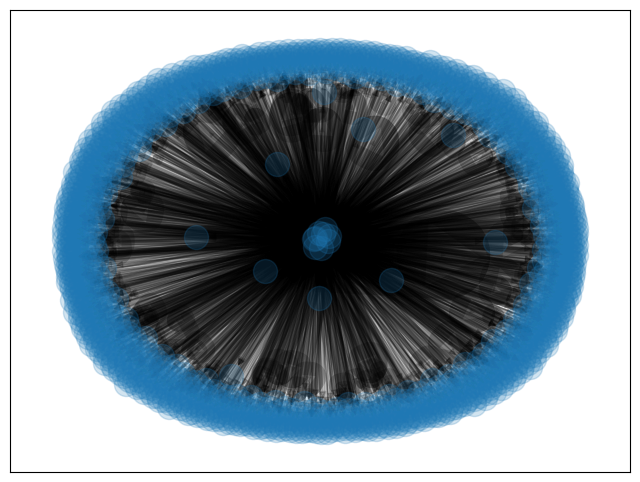

In [186]:
G = nx.from_pandas_edgelist(df_rt,'screen_name','retweet_user',
                            edge_attr="count",
                            create_using = nx.DiGraph())

pos = nx.spring_layout(G, k=0.3)

edge_w = [i['count'] for i in dict(G.edges).values()]

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (8, 6)})

nx.draw_networkx(G, edge_color="black",
                 with_labels=False,
                 alpha=0.2,
                 width=edge_w
                )

print(f"Graph has {nx.number_of_nodes(G)} nodes with {nx.number_of_edges(G)} edges")
plt.show()

In [192]:
# Create nodelist
a1 = df_rt["screen_name"].tolist()
a2 = df_rt["retweet_user"].tolist()
node_list = list(set(a1 + a2))

# Edgedata as tuples
tuples = [tuple(x) for x in df_rt[["screen_name","retweet_user", "count"]].values]

# Create network
nt = net.Network(notebook=True,
                     height = "700px",
                     width = "700px",
                     bgcolor = "#f6f2e9")

# Add nodes and edges to network
for i in node_list:
    nt.add_node(i, title=i)
nt.add_edges(tuples)

nt.force_atlas_2based()

# Save and show
nt.show('retweet_network.html')